In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix
from seaborn import scatterplot, heatmap

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

from sklearn.dummy import DummyClassifier

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Normalization
from tensorflow.keras.layers import Rescaling
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.datasets.mnist import load_data

from joblib import dump

In [3]:
# Use pandas to read the CSV file into a DataFrame
df = pd.read_csv("./ai1/datasets/dataset_reoffending.csv")

<h1>Looking at dataset </h1>

In [4]:
df.shape

(25835, 53)

In [5]:
df.describe(include="all")

,id,gender,race,age,address,gang_affiliated,risk_score,supervision_level,education_level,dependents,...,cocaine_positive_tests,meth_positive_tests,other_positive_tests,days_employed,jobs_per_year,employment_exempt,reoffended_within_3_years,reoffended_in_year_1,reoffended_in_year_2,reoffended_in_year_3
count,25835.000000,25835,25835,25835,25835.000000,22668,25360.000000,24115,25835,25835,...,20663.000000,20663.000000,20663.00000,25373.000000,25027.000000,25835,25835,25835,25835,25835
unique,NaN,2,2,7,NaN,2,NaN,3,3,4,...,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2
top,NaN,M,black,23-27,NaN,False,NaN,Standard,High School Diploma,0,...,NaN,NaN,NaN,NaN,NaN,False,True,False,False,False
freq,NaN,22668,14847,5176,NaN,18730,NaN,9983,11390,8037,...,NaN,NaN,NaN,NaN,NaN,22399,14904,18111,21268,23222
mean,13314.004838,NaN,NaN,NaN,12.361796,NaN,6.082216,NaN,NaN,NaN,...,0.013741,0.012890,0.00755,0.482331,0.769295,NaN,NaN,NaN,NaN,NaN
std,7722.206327,NaN,NaN,NaN,7.133742,NaN,2.381442,NaN,NaN,NaN,...,0.061233,0.060581,0.04115,0.425004,0.813787,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.00000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,6626.500000,NaN,NaN,NaN,6.000000,NaN,4.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.00000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,13270.000000,NaN,NaN,NaN,12.000000,NaN,6.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.00000,0.475728,0.635217,NaN,NaN,NaN,NaN,NaN
75%,20021.500000,NaN,NaN,NaN,18.000000,NaN,8.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.00000,0.969325,1.000000,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Data columns (total 53 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    25835 non-null  int64  
 1   gender                                25835 non-null  object 
 2   race                                  25835 non-null  object 
 3   age                                   25835 non-null  object 
 4   address                               25835 non-null  int64  
 5   gang_affiliated                       22668 non-null  object 
 6   risk_score                            25360 non-null  float64
 7   supervision_level                     24115 non-null  object 
 8   education_level                       25835 non-null  object 
 9   dependents                            25835 non-null  object 
 10  offence                               22558 non-null  object 
 11  years_in_prison

In [7]:
nominal_features = ["gender", "race", "age", "gang_affiliated", "supervision_level", "education_level", "dependents", "offence", \
                    "years_in_prison", "num_delinquency_reports", "num_program_attendances", "num_unexcused_absences", "num_residence_changes", \
                    "domestic_violence_arrests", "gun_arrests", "violence_convictions", "parole_violation_convictions", \
                    "domestic_violence_convictions", "gun_convictions", "parole_revocations", "probation_revocations", "cs_programme", \
                    "other_condition", "electronic_monitoring_violations", "instruction_following_violations", "failure_to_report_violations", \
                    "moving_without_permission_violations"]
arrests = ["felony_arrests", "misdemeanor_arrests", "violence_arrests", "property_arrests", "drug_arrests", "parole_violation_arrests"]
convictions = ["felony_convictions", "misdemeanor_convictions", "property_convictions", "drug_convictions"]

In [8]:
for features in nominal_features:
    print(features, df[features].unique())

gender ['M' 'F']
race ['black' 'white']
age ['43-47' '33-37' '48 or older' '38-42' '18-22' '23-27' '28-32']
gang_affiliated [False nan True]
supervision_level ['Standard' 'Specialized' 'High' nan]
education_level ['At least some college' 'Less than HS diploma' 'High School Diploma']
dependents ['3 or more' '1' '0' '2']
offence ['Drug' 'Violent/Non-Sex' 'Property' nan 'Other' 'Violent/Sex']
years_in_prison ['More than 3 years' '1-2 years' 'Less than 1 year'
 'Greater than 2 to 3 years']
num_delinquency_reports ['0' '4 or more' '3' '2' '1']
num_program_attendances ['6' '0' '7' '9' '10 or more' '2' '1' '5' '3' '4' '8']
num_unexcused_absences ['0' '2' '3 or more' '1']
num_residence_changes ['2' '0' '3 or more' '1']
domestic_violence_arrests [False  True]
gun_arrests [False  True]
violence_convictions [False  True]
parole_violation_convictions [False  True]
domestic_violence_convictions [False  True]
gun_convictions [False  True]
parole_revocations [False  True]
probation_revocations [False

In [9]:
for x in arrests:
    print(x, df[x].value_counts())

felony_arrests felony_arrests
10 or more    6140
3             2768
4             2697
2             2622
5             2483
1             2250
6             2138
7             1818
8             1507
9             1179
0              233
Name: count, dtype: int64
misdemeanor_arrests misdemeanor_arrests
6 or more    8206
0            4099
1            3479
2            3121
3            2654
4            2340
5            1936
Name: count, dtype: int64
violence_arrests violence_arrests
0            11049
1             7287
3 or more     3886
2             3613
Name: count, dtype: int64
property_arrests property_arrests
0            6517
5 or more    5791
1            5108
2            3886
3            2653
4            1880
Name: count, dtype: int64
drug_arrests drug_arrests
0            8002
1            5562
2            4162
5 or more    3074
3            3042
4            1993
Name: count, dtype: int64
parole_violation_arrests parole_violation_arrests
0            6699
5 or more  

In [10]:
for x in convictions:
    print(x, df[x].value_counts())

felony_convictions felony_convictions
0            7539
1            6963
3 or more    6959
2            4374
Name: count, dtype: int64
misdemeanor_convictions misdemeanor_convictions
0            7819
4 or more    5982
1            5387
2            3888
3            2759
Name: count, dtype: int64
property_convictions property_convictions
0            11198
1             5896
3 or more     5435
2             3306
Name: count, dtype: int64
drug_convictions drug_convictions
0            12586
2 or more     6760
1             6489
Name: count, dtype: int64


<h1>Clean Data</h1>

In [12]:
# delete nans
df = df.dropna(subset = ["risk_score", "gang_affiliated", "offence", "supervision_level", "marijuana_positive_tests", \
                    "cocaine_positive_tests", "meth_positive_tests", "other_positive_tests", "days_employed", "jobs_per_year"])

# eliminating "or more" 
    #*** I used pandas documentation page for this method
df["felony_arrests"] = df["felony_arrests"].replace(["10 or more"], "10")
df["misdemeanor_arrests"] = df["misdemeanor_arrests"].replace(["6 or more"], "6")
df["violence_arrests"] = df["violence_arrests"].replace(["3 or more"], "3")
df["property_arrests"] = df["property_arrests"].replace(["5 or more"], "5")
df["drug_arrests"] = df["drug_arrests"].replace(["5 or more"], "5")
df["parole_violation_arrests"] = df["parole_violation_arrests"].replace(["5 or more"], "5")
df[arrests] = df[arrests].astype('int64')

df["felony_convictions"] = df["felony_convictions"].replace(["3 or more"], "3")
df["misdemeanor_convictions"] = df["misdemeanor_convictions"].replace(["4 or more"], "4")
df["property_convictions"] = df["property_convictions"].replace(["3 or more"], "3")
df["drug_convictions"] = df["drug_convictions"].replace(["2 or more"], "2")
df[convictions] = df[convictions].astype('int64')

# get rid of id column- confusing in the data and days between drug test- too many missing and not useful for me
df.drop("days_between_drug_tests", axis = 1, inplace = True)
df.drop("id", axis = 1, inplace = True)

# reset index
df.reset_index(drop=True, inplace=True)

# check how many are left
df.shape

(14280, 51)

In [13]:
# Shuffle the dataset
df = df.sample(frac=1, random_state=2)
df.reset_index(drop=True, inplace=True)

<h1> Starting tests </h1>

In [14]:
# Creating a test set
dev_df, test_df = train_test_split(df, train_size = 0.8, random_state = 4)

In [36]:
# copy of the whole dev set
copy_df = dev_df.copy()

numeric_features = ["risk_score", "marijuana_positive_tests", "cocaine_positive_tests", \
                    "meth_positive_tests", "other_positive_tests", "days_employed", "jobs_per_year", "felony_arrests", \
                    "misdemeanor_arrests", "violence_arrests", "property_arrests", "drug_arrests", "parole_violation_arrests", \
                    "felony_convictions", "misdemeanor_convictions", "property_convictions", "drug_convictions"]

features = ["gender", "race", "age", "address", "risk_score", "gang_affiliated", "supervision_level", "education_level", "dependents", \
            "offence", "years_in_prison", "felony_arrests", "misdemeanor_arrests", "violence_arrests", "property_arrests", "drug_arrests", \
            "parole_violation_arrests", "domestic_violence_arrests", "gun_arrests", "felony_convictions", "misdemeanor_convictions", \
            "violence_convictions", "property_convictions", "drug_convictions", "parole_violation_convictions", \
            "domestic_violence_convictions", "gun_convictions", "parole_revocations","probation_revocations", "mh_sa_programme", \
            "cs_programme", "other_condition", "electronic_monitoring_violations", "instruction_following_violations", \
            "failure_to_report_violations", "moving_without_permission_violations", "num_delinquency_reports", "num_program_attendances", \
            "num_unexcused_absences", "num_residence_changes", "marijuana_positive_tests", \
            "cocaine_positive_tests", "meth_positive_tests", "other_positive_tests", "days_employed", "jobs_per_year", "employment_exempt"]

<h2>Correlation Check</h2>

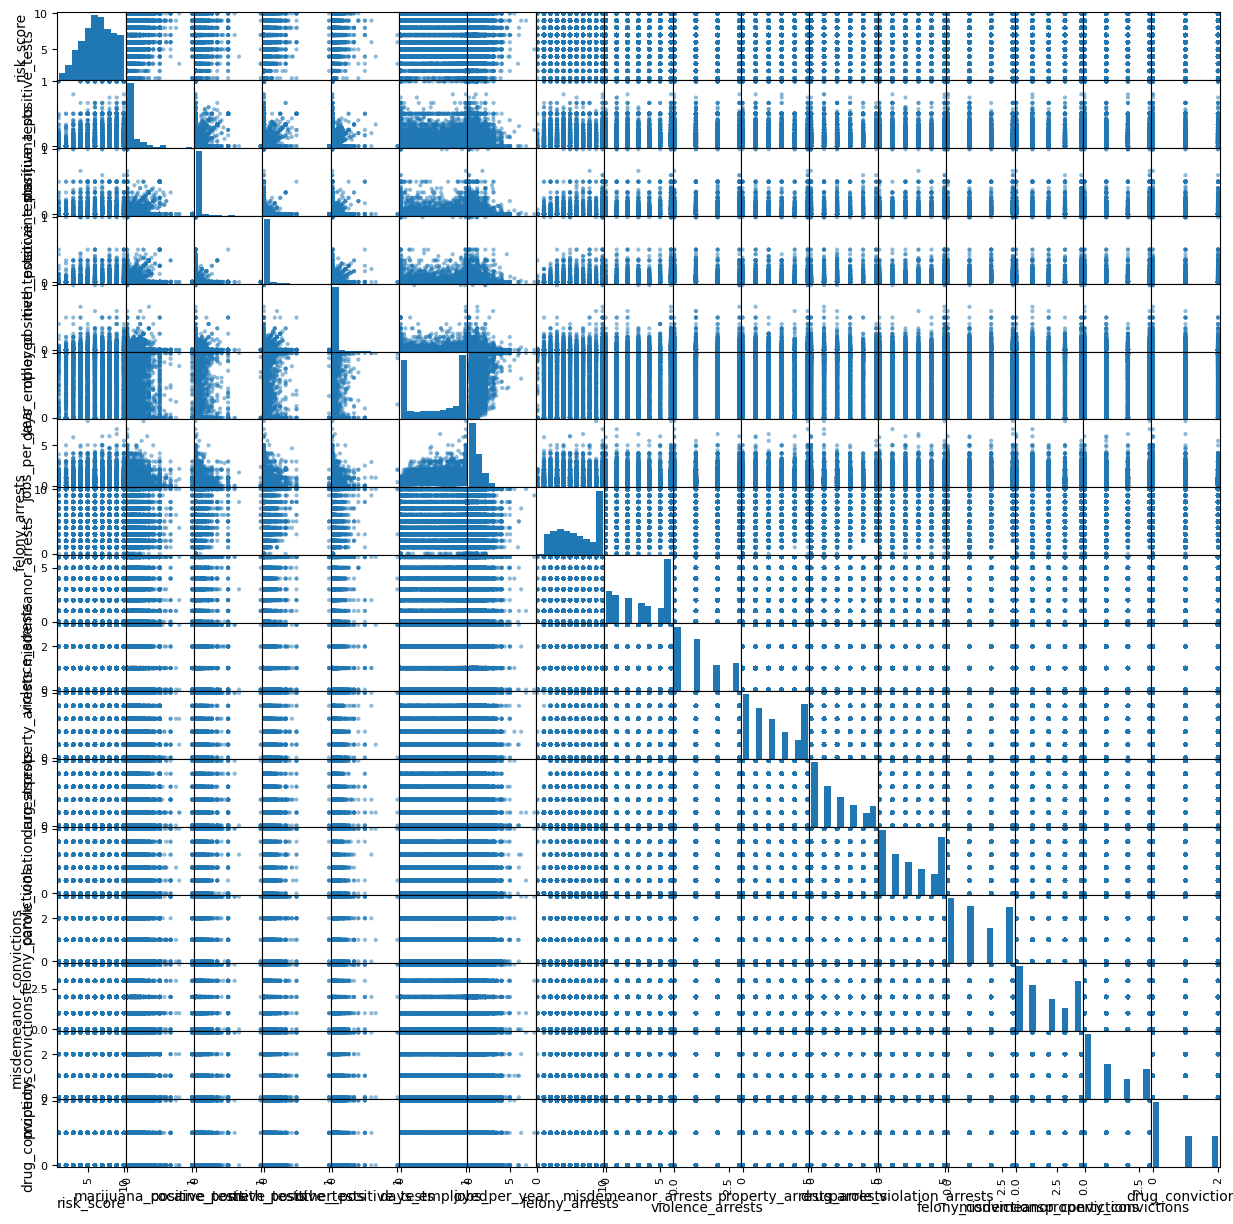

In [18]:
# looking at correlations
num_df = copy_df[numeric_features].copy()

m = scatter_matrix(num_df, figsize=(15, 15))

In [19]:
copy_df[["risk_score", "marijuana_positive_tests", "cocaine_positive_tests", \
         "meth_positive_tests", "other_positive_tests", "days_employed", "jobs_per_year", "felony_arrests", \
         "misdemeanor_arrests", "violence_arrests", "property_arrests", "drug_arrests", "parole_violation_arrests", \
         "felony_convictions", "misdemeanor_convictions", "property_convictions", "drug_convictions", "reoffended_within_3_years"]].corr()

,risk_score,marijuana_positive_tests,cocaine_positive_tests,meth_positive_tests,other_positive_tests,days_employed,jobs_per_year,felony_arrests,misdemeanor_arrests,violence_arrests,property_arrests,drug_arrests,parole_violation_arrests,felony_convictions,misdemeanor_convictions,property_convictions,drug_convictions,reoffended_within_3_years
risk_score,1.000000,0.260050,0.018153,0.033986,0.021284,-0.067570,0.029004,0.046580,-0.089912,-0.087257,0.116999,0.009819,0.046860,-0.046468,-0.062296,0.128819,0.032586,0.202209
marijuana_positive_tests,0.260050,1.000000,0.118184,0.053066,0.029897,-0.146823,-0.064601,-0.001904,-0.021859,-0.001857,-0.000806,0.009773,0.036435,-0.045802,-0.008192,-0.009505,0.010341,0.139974
cocaine_positive_tests,0.018153,0.118184,1.000000,-0.009086,0.057926,-0.079104,-0.051856,0.123359,0.065862,0.042523,0.107977,0.030264,0.114315,0.104017,0.072289,0.114772,0.026473,0.047479
meth_positive_tests,0.033986,0.053066,-0.009086,1.000000,0.121015,-0.042187,-0.016333,0.080091,0.089128,-0.016140,0.067930,0.066046,0.103999,0.051498,0.074301,0.057697,0.059337,0.081405
other_positive_tests,0.021284,0.029897,0.057926,0.121015,1.000000,-0.024304,-0.004126,0.047720,0.041470,0.010078,0.033742,0.021865,0.067713,0.024756,0.041312,0.033990,0.009065,0.045268
days_employed,-0.067570,-0.146823,-0.079104,-0.042187,-0.024304,1.000000,0.617732,-0.067296,-0.038404,-0.024406,-0.087007,-0.001741,-0.086347,-0.017190,-0.041650,-0.062414,-0.003658,-0.270341
jobs_per_year,0.029004,-0.064601,-0.051856,-0.016333,-0.004126,0.617732,1.000000,-0.037966,-0.014139,-0.019106,-0.023305,-0.043195,-0.012915,-0.011256,-0.014465,-0.000705,-0.035953,-0.028403
felony_arrests,0.046580,-0.001904,0.123359,0.080091,0.047720,-0.067296,-0.037966,1.000000,0.542150,0.301995,0.659326,0.469157,0.682616,0.661544,0.525634,0.562653,0.357948,0.172655
misdemeanor_arrests,-0.089912,-0.021859,0.065862,0.089128,0.041470,-0.038404,-0.014139,0.542150,1.000000,0.323657,0.410915,0.418891,0.635985,0.434635,0.775368,0.372191,0.348254,0.142046
violence_arrests,-0.087257,-0.001857,0.042523,-0.016140,0.010078,-0.024406,-0.019106,0.301995,0.323657,1.000000,0.106766,0.041895,0.176096,0.213670,0.277768,0.087365,0.013086,0.044031


In [20]:
# more feature engineering
copy_df["job_stability"] = copy_df["days_employed"] / copy_df["jobs_per_year"]   # higher number = more stable

copy_df[["job_stability", "jobs_per_year", "days_employed", "reoffended_within_3_years"]].corr()

,job_stability,jobs_per_year,days_employed,reoffended_within_3_years
job_stability,1.000000,-0.493952,0.372400,-0.349057
jobs_per_year,-0.493952,1.000000,0.617732,-0.028403
days_employed,0.372400,0.617732,1.000000,-0.270341
reoffended_within_3_years,-0.349057,-0.028403,-0.270341,1.000000


Created Job stability feature to determine if people could hold a job for a long period of time

/Users/emmaraupp/artificial_intelligence_2023_2024/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emmaraupp/artificial_intelligence_2023_2024/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


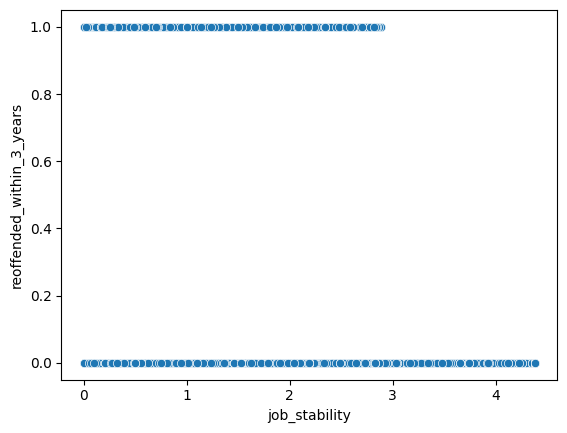

In [21]:
plot = scatterplot(x="job_stability", y="reoffended_within_3_years", data=copy_df)

higher job stability number is slightly correlated with lower chance of reoffending, but not perfect numbers

In [22]:
# feature engineering for drugs
copy_df["drug_usage"] = (copy_df["marijuana_positive_tests"] + copy_df["cocaine_positive_tests"] + copy_df["meth_positive_tests"] + \
                         copy_df["other_positive_tests"])

Created drug usage to see what percentage of drugs came back positive for people- data was already scaled so no need for days between drug tests, a reason why it was deleted

In [23]:
copy_df[["drug_usage", "reoffended_within_3_years"]].corr()

,drug_usage,reoffended_within_3_years
drug_usage,1.000000,0.161267
reoffended_within_3_years,0.161267,1.000000


In [69]:
plot = scatterplot(x="drug_usage", y="reoffended_within_3_years", data=copy_df)

ValueError: Could not interpret value `drug_usage` for parameter `x`

In [67]:
copy_df["arrests_and_convictions"] = copy_df["felony_arrests"] + copy_df["misdemeanor_arrests"] + copy_df["violence_arrests"] + \
                                     copy_df["property_arrests"] + copy_df["drug_arrests"]+ copy_df["parole_violation_arrests"] + \
                                     copy_df["felony_convictions"]+ copy_df["misdemeanor_convictions"] + copy_df["property_convictions"] + \
                                     copy_df["drug_convictions"]

copy_df[["arrests_and_convictions", "reoffended_within_3_years"]].corr()

ValueError: Could not interpret value `drug_usage` for parameter `x`

to see if the number of arrests and convictions someone has seems to have much impact on their recidivism

<P>Results: The feature that appeared most correlated with reoffending in 3 years was Job Stability</P>

<h2>Decision Tree</h2>

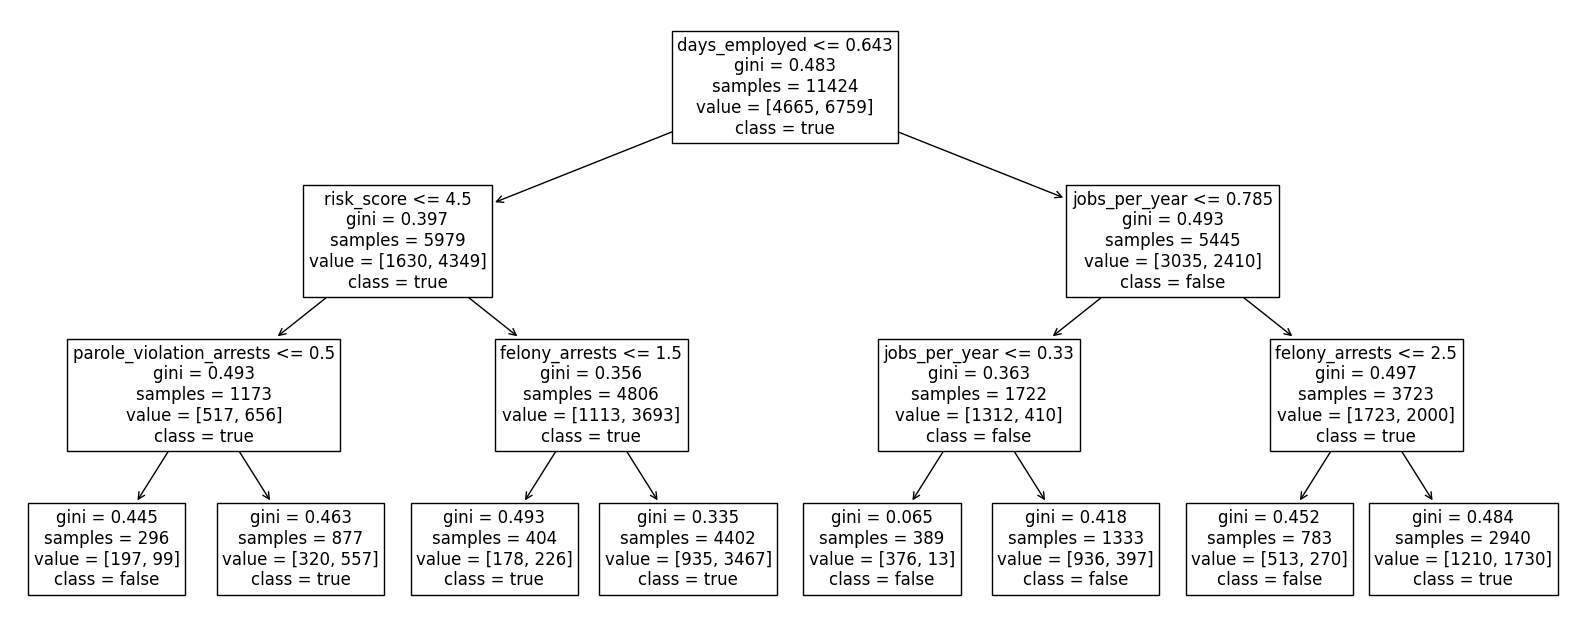

In [26]:
# Extract the features
crime_X = copy_df[numeric_features].values

# Target values
label_encoder = LabelEncoder()
crime_Y = label_encoder.fit_transform(copy_df["reoffended_within_3_years"])

# Create the Decision Tree object
tree_classifier = DecisionTreeClassifier(max_depth=3)

# Fit the model. Note that scaling of the data is not needed.
tree_classifier.fit(crime_X, crime_Y)

#plot the data
fig = plt.figure(figsize=(20,8))
plot = plot_tree(tree_classifier, feature_names=copy_df[numeric_features].columns.tolist(), class_names=["false", "true"], fontsize=12)
plt.show()

<h1>Neural Network</h1>

In [27]:
# Extract the features 
crime_X = copy_df[numeric_features].values
test_X = test_df[numeric_features].values

# Target values
label_encoder = LabelEncoder()
label_encoder.fit(copy_df["reoffended_within_3_years"])
crime_Y = label_encoder.transform(copy_df["reoffended_within_3_years"])
test_Y = label_encoder.transform(copy_df["reoffended_within_3_years"])

In [28]:
means = crime_X.mean(axis=0)
st_devs = crime_X.std(axis=0)

crime_X -= means
crime_X /= st_devs

test_X -= means
test_X /= st_devs

In [32]:
inputs = Input(shape=(17,))
x = Normalization()(inputs)
x = Dense(64, activation="relu")(x)
x = Dense(64, activation="relu")(x)
outputs = Dense(1, activation="sigmoid")(x)
model = Model(inputs, outputs)

model.compile(optimizer=RMSprop(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

In [33]:
model.fit(crime_X, crime_Y, epochs=50, batch_size=18, verbose=0)

In [34]:
train_loss, train_acc = model.evaluate(crime_X, crime_Y)
train_acc

357/357 [==============================] - 0s 452us/step - loss: 0.4607 - accuracy: 0.7803


0.7802870869636536

Although accuracy is high the dataset is extremely small because it only uses numeric features

<h1>Accuracy and Error Estimation</h1>

In [37]:
# Extract the features 
crime_X = copy_df[features]
test_X = test_df[features]

# Target values
crime_Y = copy_df["reoffended_within_3_years"].values
test_Y = test_df["reoffended_within_3_years"].values

In [38]:
# Test against dummy for accuracy estimation

maj = DummyClassifier()
maj.fit(crime_X, crime_Y)
accuracy_score(test_Y, maj.predict(test_X))

0.5896358543417367

<h3>kNN</h3>

In [39]:
class InsertJobStability(BaseEstimator, TransformerMixin):

    def __init__(self, insert=True):
        self.insert = insert
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        if self.insert:
            X["job_stability"] = X["days_employed"] / X["jobs_per_year"]
    
            X = X.replace( [ np.inf, -np.inf ], np.nan )
        return X

In [40]:
preprocessor = ColumnTransformer([
        ("num", Pipeline([("job_stability", InsertJobStability()), 
                          ("imputer", SimpleImputer(missing_values=np.nan, strategy="mean")),
                          ("scaler", StandardScaler())]),
                numeric_features),
        ("nom", Pipeline([("imputer", SimpleImputer(missing_values=np.nan, strategy="most_frequent")), 
                          ("binarizer", OneHotEncoder(handle_unknown="ignore"))]), 
                nominal_features)],
        remainder="passthrough")

In [41]:
# Create a pipeline that combines the preprocessor with kNN
knn = Pipeline([
    ("preprocessor", preprocessor),
    ("predictor", KNeighborsRegressor())])

# Create a dictionary of hyperparameters for kNN
knn_param_grid = {"predictor__n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                  "preprocessor__num__job_stability__insert": [True, False]}

# Create the grid search object which will find the best hyperparameter values based on validation error
knn_gs = GridSearchCV(knn, knn_param_grid, scoring="neg_mean_absolute_error", cv=10, refit=True)

# Run grid search by calling fit. It will also re-train on train+validation using the best parameters.
knn_gs.fit(crime_X, crime_Y)

# Let's see how well we did
knn_gs.best_params_, knn_gs.best_score_

({'predictor__n_neighbors': 1,
  'preprocessor__num__job_stability__insert': True},
 -0.39163069808918366)

In [42]:
knn.set_params(**knn_gs.best_params_) 
scores = cross_validate(knn, crime_X, crime_Y, cv=10, 
                        scoring="neg_mean_absolute_error", return_train_score=True)
print("Training error: ", np.mean(np.abs(scores["train_score"])))
print("Validation error: ", np.mean(np.abs(scores["test_score"])))

Training error:  0.0
Validation error:  0.39163069808918366


training error is 0 because the best fit was 1NN, this is overfitting so this model should not be used on the test data

In [43]:
knn = Pipeline([
    ("preprocessor", preprocessor),
    ("predictor", KNeighborsClassifier())])

knn_param_grid = {"predictor__n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                  "preprocessor__num__job_stability__insert": [True, False]}

# Get the accuracy of the model
knn_gs = GridSearchCV(knn, knn_param_grid, scoring="accuracy", cv=10, refit=True)

knn_gs.fit(crime_X, crime_Y)

knn_gs.best_params_, knn_gs.best_score_

({'predictor__n_neighbors': 9,
  'preprocessor__num__job_stability__insert': True},
 0.672180316339617)

In [44]:
knn.set_params(**knn_gs.best_params_) 
scores = cross_validate(knn, crime_X, crime_Y, cv=10, 
                        scoring="accuracy", return_train_score=True)
print("Training accuracy: ", np.mean(np.abs(scores["train_score"])))
print("Validation accuracy: ", np.mean(np.abs(scores["test_score"])))

Training accuracy:  0.7449132441986481
Validation accuracy:  0.672180316339617


<h2>Ridge Regression</h2>

In [45]:
class MetaTransformer(BaseEstimator, TransformerMixin):

    def __init__(self, transformer=None):
        self.transformer = transformer
        
    def fit(self, X, y=None):
        if self.transformer:
            self.transformer.fit(X, y)
        return self
    
    def transform(self, X, y=None):
        if self.transformer:
            return self.transformer.transform(X)
        else:
            return X

In [46]:
preprocessor = ColumnTransformer([
        ("num", Pipeline([("job_stability", InsertJobStability()),
                          ("imputer", SimpleImputer(missing_values=np.nan, strategy="mean")),
                          ("scaler", MetaTransformer())]), 
                numeric_features),
        ("nom", Pipeline([("imputer", SimpleImputer(missing_values=np.nan, strategy="most_frequent")), 
                          ("binarizer", OneHotEncoder(handle_unknown="ignore"))]), 
                nominal_features)],
        remainder="passthrough")

In [47]:
# Create a pipeline that combines the preprocessor with ridge regression
ridge = Pipeline([
    ("preprocessor", preprocessor),
    ("predictor", Ridge())])

# Create a dictionary of hyperparameters for rideg regression
ridge_param_grid = {"preprocessor__num__job_stability__insert": [True, False],
                     "preprocessor__num__scaler__transformer": [StandardScaler(), MinMaxScaler(), RobustScaler()],
                     "predictor__alpha": [0, 45.0, 50.0, 55.0]}

# Create the grid search object which will find the best hyperparameter values based on validation error
ridge_gs = GridSearchCV(ridge, ridge_param_grid, scoring="neg_mean_absolute_error", cv=10, refit=True)

# Run grid search by calling fit. It will also re-train on train+validation using the best parameters.
ridge_gs.fit(crime_X, crime_Y)

# Let's see how well we did
ridge_gs.best_params_, ridge_gs.best_score_

({'predictor__alpha': 0,
  'preprocessor__num__job_stability__insert': True,
  'preprocessor__num__scaler__transformer': StandardScaler()},
 -0.37765955273959934)

In [48]:
ridge.set_params(**ridge_gs.best_params_) 
scores = cross_validate(ridge, crime_X, crime_Y, cv=10, 
                        scoring="neg_mean_absolute_error", return_train_score=True)
print("Training error: ", np.mean(np.abs(scores["train_score"])))
print("Validation error: ", np.mean(np.abs(scores["test_score"])))

Training error:  0.3748966712108839
Validation error:  0.37765955273959934


In [49]:
ridge = Pipeline([
    ("preprocessor", preprocessor),
    ("predictor", RidgeClassifier())])

ridge_param_grid = {"preprocessor__num__job_stability__insert": [True, False],
                     "preprocessor__num__scaler__transformer": [StandardScaler(), MinMaxScaler(), RobustScaler()],
                     "predictor__alpha": [0, 45.0, 50.0, 55.0]}

# Get the accuracy of the model
ridge_gs = GridSearchCV(ridge, ridge_param_grid, scoring="accuracy", cv=10, refit=True)

ridge_gs.fit(crime_X, crime_Y)

ridge_gs.best_params_, ridge_gs.best_score_

({'predictor__alpha': 55.0,
  'preprocessor__num__job_stability__insert': True,
  'preprocessor__num__scaler__transformer': MinMaxScaler()},
 0.7238262905403025)

In [50]:
ridge.set_params(**ridge_gs.best_params_) 
scores = cross_validate(ridge, crime_X, crime_Y, cv=10, 
                        scoring="accuracy", return_train_score=True)
print("Training accuracy: ", np.mean(scores["train_score"]))
print("Validation accuracy: ", np.mean(scores["test_score"]))

Training accuracy:  0.7258987109187671
Validation accuracy:  0.7238262905403025


<h2>Logistic Regression

In [51]:
preprocessor = ColumnTransformer([
        ("num", Pipeline([("job_stability", InsertJobStability()), 
                          ("imputer", SimpleImputer(missing_values=np.nan, strategy="mean")),
                          ("scaler", StandardScaler())]),
                numeric_features),
        ("nom", Pipeline([("imputer", SimpleImputer(missing_values=np.nan, strategy="most_frequent")), 
                          ("binarizer", OneHotEncoder(handle_unknown="ignore"))]), 
                nominal_features)],
        remainder="passthrough")

In [52]:
logistic = Pipeline([
    ("preprocessor", preprocessor),
    ("predictor", LogisticRegression(max_iter = 1000))])

#np.mean(cross_val_score(logistic, crime_X, crime_Y, scoring="accuracy", cv=10))

# Create a dictionary of hyperparameters for kNN
logistic_param_grid = {"predictor__C": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

# Create the grid search object which will find the best hyperparameter values based on validation error
logistic_gs = GridSearchCV(logistic, logistic_param_grid, scoring="accuracy", cv=10, refit=True)

# Run grid search by calling fit. It will also re-train on train+validation using the best parameters.
logistic_gs.fit(crime_X, crime_Y)

# Let's see how well we did
logistic_gs.best_params_, logistic_gs.best_score_

({'predictor__C': 8}, 0.7226881666061444)

In [53]:
logistic.set_params(**logistic_gs.best_params_) 
scores = cross_validate(logistic, crime_X, crime_Y, cv=10, 
                        scoring="accuracy", return_train_score=True)
print("Training accuracy: ", np.mean(scores["train_score"]))
print("Validation accuracy: ", np.mean(scores["test_score"]))

Training accuracy:  0.7261904706496713
Validation accuracy:  0.7226881666061444


<h2>Multinominal Logistic</h2>

In [57]:
#preprocessor = ColumnTransformer([
 #       ("num", Pipeline([("job_stability", InsertJobStability()), 
 #                         ("imputer", SimpleImputer(missing_values=np.nan, strategy="mean")),
 #                         ("scaler", StandardScaler())]),
 #               numeric_features),
 #       ("nom", Pipeline([("imputer", SimpleImputer(missing_values=np.nan, strategy="most_frequent")), 
 #                         ("binarizer", OneHotEncoder(handle_unknown="ignore"))]), 
 #               nominal_features)],
 #       remainder="passthrough")

In [58]:
#multinomial = Pipeline([
#    ("preprocessor", preprocessor),
#    ("predictor", LogisticRegression(penalty=None))])

# Get the validation error
#np.mean(cross_val_score(multinomial, copy_df, crime_Y, scoring="accuracy", cv=10))

1.0

In [60]:
# Create a pipeline that combines the preprocessor with multinomial logistic regression
#ovr = Pipeline([
#    ("preprocessor", preprocessor),
 #   ("predictor", LogisticRegression(multi_class="ovr", max_iter=1000))])

# We don't need a grid search because we're not regularizing, so we don't have that hyperparameter.

# Get the validation error
#np.mean(cross_val_score(ovr, copy_df, crime_Y, scoring="accuracy", cv=10))

1.0

In [63]:
# Create a pipeline that combines the preprocessor with logistic regression with L2-regularization
#logisticL2 = Pipeline([
#    ("preprocessor", preprocessor),
#    ("predictor", LogisticRegression(solver="saga", penalty="l2", max_iter=1000))])

# Create a dictionary of hyperparameters for ridge regression
#logisticL2_param_grid = {"predictor__C": [0.1, 0.3, 0.5],}

# Create the grid search object which will find the best hyperparameter values based on validation error
#logisticL2_gs = GridSearchCV(logisticL2, logisticL2_param_grid, scoring="accuracy", cv=10, refit=True)

# Run grid search by calling fit. It will also re-train on train+validation using the best parameters.
#logisticL2_gs.fit(copy_df, crime_Y)

# Let's see how well we did
#logisticL2_gs.best_params_, logisticL2_gs.best_score_

({'predictor__C': 0.1}, 1.0)

All came back as 100%, probably because these methods do not work for binary classfication

<h1>Test Set!</h1>

Ridge classifier had the best accuracy and not as much of a difference between the validation and the training data, so there was less overfitting than there was for logistic and knn. Since the neural networks were only tested on the numeric data, they won't work

In [66]:
# Now we test on the test set
# Re-train Logistic Regression on train+validation and test on the test set
accuracy_score(test_Y, ridge_gs.predict(test_X))

0.7251400560224089